<font color='red'>**Investigation of Diffraction at Single-Slit Based on the the Combination of DMSRP, Spreadsheets and Dynamic Simulations** </font>

**By illuminating the slit with laser light, the Digital Measurement System based on Raspberry Pi DMSRP shows a bright central maximum followed by dimmer and thinner maxima on either side, which can be easily visualised and measured in the measuring window of the DMSRP.**

<font color='red'>Goals:</font>
* The measurements DMSRP stored in .csv file are analysed with spreadsheets to determine the ratio of the intensity of different maxima to 
the central maximum.
* Deducing the equations for diffraction orders as well as the relative intensities of light fringes based on comprehensible mathematical model to model the DMSRP visualised pattern.
* Employing a model based on the phasor analysis to relate the phasor diagram with the intensity distribution of the single-slit pattern. 
* Exploring the effect of various slit widths at different wavelengths on  the intensity distribution of the diffraction pattern.

In [1]:
%%capture 
%pip install matplotlib pandas scikit-learn 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider, IntSlider, FloatText

# Import the DMSRP measurements  stored in.csv file. These are analysed with spreadsheets to determine the ratio of the intensity of different maxima to the central maximum.

In [3]:
df = pd.read_csv("testfile_200222-1124_Beugung_0.2.csv", skiprows=2)
df = df.drop("# I:(a.U.)", axis=1)
df = df.rename(columns={"Unnamed: 1": "t", "Unnamed: 2": "U"})
df

,t,U
0,0.00,0.003015
1,0.05,0.002082
2,0.10,0.002641
3,0.15,0.002455
4,0.20,0.002641
...,...,...
192,9.60,0.002082
193,9.65,0.002455
194,9.70,0.001895
195,9.75,0.002268


# Plot  the intensity of light at different points on the screen. The BPW34 photodiode of the DMSRP with high radiant sensitivity transforms the light intensity in Voltage U. 

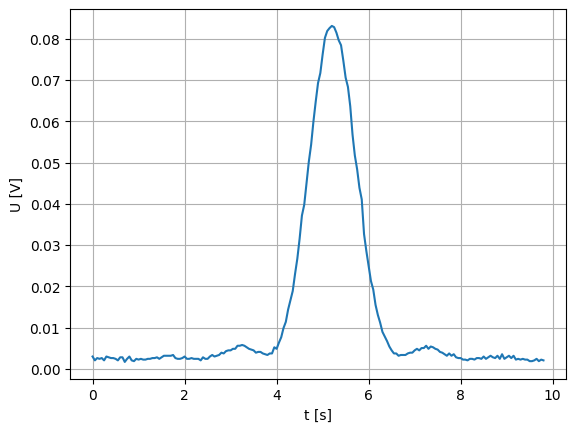

In [4]:
plt.plot(df["t"], df["U"])
plt.grid(True)
plt.xlabel("t [s]")
plt.ylabel("U [V]")
plt.show()

<font color='blue'>**Comprehensible mathematical phasor model based on the DMSRP visualised pattern.** </font>

The electric field of each wavelet is a phasor whose orientation is given by its phase state. 
Since the electric field vectors have the same amplitude and angular frequencies, and each successive component has the same phase shift relative the previous one, the phasors can be arranged in an arc of a circle. 
The total time-independent component of electric field at certain point on the screen is given by the magnitude of the phasor resulting from adding all the individual wavelets’ contributions. 

<font color='red'>**Dynamic representation of the phasors for different diffraction angles** </font>

In [5]:
from IPython.display import IFrame
IFrame('https://www.geogebra.org/classic/Jd2VfGCH', width=800, height=600, style="border: 1px solid black")

**The simulation shows that the amplitude of the resultant phasor reaches its maximum if the phasors are laid end to end in a straight line, whereas the minimum of intensity is reached when the phasors add to zero, after rotating through 2π one or more times.** 

# The intensity of the maxima is proportional to the energy transported by electromagnetic waves. The intensity of light at an arbitrary point on the screen is put in relation to the time average of the square of the total electric field.$$I=I_{0} \cdot \frac{sin^{2}\left( \pi \cdot \frac{a\cdot sin( \alpha )}{\lambda }\right)}{\left( \pi \cdot \frac{a\cdot sin( \alpha )}{\lambda }\right)^{2}}$$

# With the following Python Code one can explore the effect of various slit widths at different wavelengths on the intensity of diffraction pattern. In the function above, one can vary the width a of the slit, the wavelength λ and the diffraction angle. One can visualise the intensity of the diffraction pattern at a given position x on the screen. 

In [6]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }
def func(x, a, λ):
    numerator1 = np.sin((a / λ) * np.pi * np.sin(x))
    denominator1 = np.pi * (a / λ) * np.sin(x)
    term = (numerator1 / denominator1)**2
    return term


def plot_func(a, λ, point_x):
    f = lambda x: func(x, a, λ)
    x = np.linspace(-1, 1, 1000)
    y = np.array(list(map(f, x)))
    point_y = f(point_x)

    plt.plot(x, y)

    # Add point to graph
    plt.scatter([point_x], [point_y], color='red')
    print(f"(x|{point_y})")

    plt.grid(True)
    plt.title('Diffraction at Single Slit', fontdict=font)
    #plt.text(0.55, 0.95, r'$\cos(2 \pi t) \exp(-t)$', fontdict=font)
    plt.xlabel('alpha(rad)', fontdict=font)
    plt.ylabel('I(mV)', fontdict=font)
    plt.show()


a_slider = FloatSlider(value=0.4, min=0.4, max=3, step=0.01, description='a_in_microm:')
λ_slider = FloatSlider(value=0.4, min=0.4, max=0.8, step=0.1, description='λ_in_micro:')
x_value = FloatText(value=0.1, description='x:', disabled=False)

interact(plot_func, a=a_slider, λ=λ_slider, point_x=x_value)
pass

interactive(children=(FloatSlider(value=0.4, description='a_in_microm:', max=3.0, min=0.4, step=0.01), FloatSl…